In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])
import scipy as sp
from scipy.integrate import quad
from scipy.optimize import curve_fit

# Tutorial

**The goal of this tutorial is to**

* **(i) get practice numerically calculating potentials given complicated charge distributions**
* **(ii) learn to use the curve_fit function in scipy.**

Consider a uniform line-charge distribution parametetrized by $\theta$ with total charge $Q$ located at

$$\vec{r} = (R\cos(2\theta), R\sin(2\theta), R\theta)$$

for $-\pi \leq \theta \leq \pi$. This represents a ''spring'' of charge of with total $Q$. 

## Question 1
Plot the potential along the $x$ axis for $x:2R \to 10R$.
## Question 2
For the region $x:100R \to 110R$, fit the potential to the curve $f(x;a)=\frac{a}{x/R}$. What value of $a$ do you get? Then, using this value of $a$, plot $V(x\hat{x})$ and $f(x;a)$ on the same plot in 

* the region $x:2R \to 5R$.
* the region $x:200R \to 210R$

## Question 3
Using your fit value for $a$, re-express the formula for $V(x\hat{x})$. Compare it to the formula for the potential $V(x \hat{x})$ for a point charge at the origin. Does this look familiar? Why is this the case? Comment on why, in question 2, the fit better extrapolates to the region $x:200R \to 210R$ than to the region $x:2R \to 5R$.

## Answer 1

Go through algebra by hand on IPAD and show students that

$$\left( \frac{8 \pi^2 \epsilon_0 R}{Q} \right)V(x\hat{x}) = \int_{0}^{2\pi}\frac{1}{\sqrt{(x/R-\cos(2\theta'))^2+\sin(2\theta')^2+\theta'^2}}d\theta'$$

As done in the first tutorial and assignment, first create integrand and potential as two seperate functions.

In [2]:
def integrand(theta, x_R):
    return 1/np.sqrt((x_R-np.cos(2*theta))**2+np.sin(2*theta)**2+theta**2)
def potential(x_R):
    return quad(integrand, 0, 2*np.pi, args=[x_R])[0]

Evaluate the integral for many different values of $X/R$.

In [3]:
x_Rs = np.linspace(2,10,1000)
potentials = np.array([potential(x_R) for x_R in x_Rs])

Plot

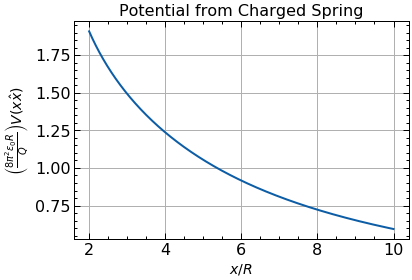

In [4]:
plt.plot(x_Rs, potentials)
plt.xlabel('$x/R$', fontsize=14)
plt.ylabel(r'$\left( \frac{8 \pi^2 \epsilon_0 R}{Q} \right)V(x\hat{x})$', fontsize=14)
plt.grid()
plt.title('Potential from Charged Spring')
plt.show()

## Answer 2

Here we go over the scipy curve fitting model: documentation can be found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

For basic use, the function is of the form `curve_fit(f, xdata, ydata, p0)`

* `f`: The function we are trying to ''fit''. By ''fit'' we mean the function has a domain $x \in \mathbb{R}$ but also has some constants $c_1$, $c_2$, ... that specify the shape of the function. For example, the function $f(x; c_1, c_2) = c_1 x + c_2 x^2$ takes in all real numbers for $x$ and its shape is specified by $c_1$ and $c_2$. 
* `x_data` and `y_data`: these correspond to the points we want to fit the function to. Our goal is to choose $c_1$ and $c_2$ such that $f(x_{data}; c_1, c_2) \approx y_{data}$

In our example we have a function we want to fit $f(x;a)$ and the `x_data` are values of $x$ in ($20R$,$30R$) and and `y_data` is $V(x)$. 

* `p0` Are initial *guesses* of what we believe $c_1$ and $c_2$ should be. If our initial guesses aren't close enough, then scipy will never converge to the optimal parameters

In [5]:
def fitted_function(x_R,a):
    return a/x_R

Here we define our `x_data`, `y_data` and we use `curve_fit` to get some results.

In [6]:
x_data = np.linspace(100, 110, 100)
y_data = np.array([potential(x_R) for x_R in x_data])
fit_results = curve_fit(fitted_function, x_data, y_data, p0=[1])

Lets take a look at `fit_results` (the output from curve_fit)

In [7]:
fit_results

(array([6.27955969]), array([[4.0824332e-10]]))

It returns a tuple where the first array contains $c_1$, $c_2$, ... (in our case we only have one fit parameter $a$ so the array is just a length of 1) and the second array contains error information (no need to worry about that in this course). Lets extract the value for $a$:

In [8]:
a_fit = fit_results[0][0]

Now lets see how well the fitted function does.

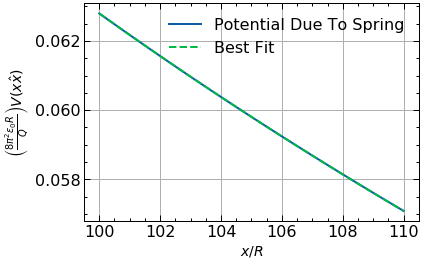

In [9]:
plt.plot(x_data, y_data, label='Potential Due To Spring')
plt.plot(x_data, fitted_function(x_data, a_fit), label='Best Fit', ls='--')
plt.xlabel('$x/R$', fontsize=14)
plt.ylabel(r'$\left( \frac{8 \pi^2 \epsilon_0 R}{Q} \right)V(x\hat{x})$', fontsize=14)
plt.grid()
plt.legend()
plt.show()

Now lets see how well it does in the region $x:2R \to 5R$

In [10]:
x_data = np.linspace(2, 5, 100)
y_data = np.array([potential(x_R) for x_R in x_data])

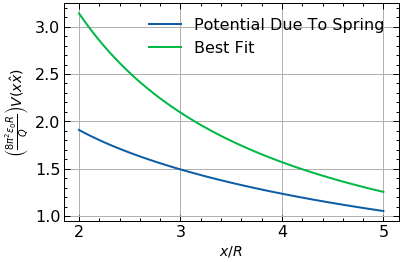

In [11]:
plt.plot(x_data, y_data, label='Potential Due To Spring')
plt.plot(x_data, fitted_function(x_data, a_fit), label='Best Fit')
plt.xlabel('$x/R$', fontsize=14)
plt.ylabel(r'$\left( \frac{8 \pi^2 \epsilon_0 R}{Q} \right)V(x\hat{x})$', fontsize=14)
plt.grid()
plt.legend()
plt.show()

Now lets see how well it does in the region $x:200R \to 210R$

In [12]:
x_data = np.linspace(200, 210, 100)
y_data = np.array([potential(x_R) for x_R in x_data])

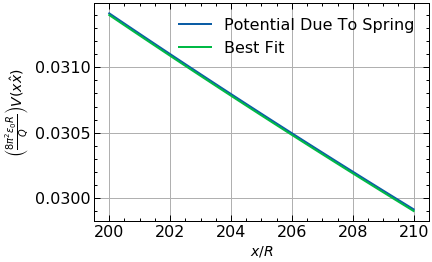

In [13]:
plt.plot(x_data, y_data, label='Potential Due To Spring')
plt.plot(x_data, fitted_function(x_data, a_fit), label='Best Fit')
plt.xlabel('$x/R$', fontsize=14)
plt.ylabel(r'$\left( \frac{8 \pi^2 \epsilon_0 R}{Q} \right)V(x\hat{x})$', fontsize=14)
plt.grid()
plt.legend()
plt.show()

Clearly the fit (done in the region $x:100R \to 110R$) better extrapolates to the region $x:200R \to 210R$ than it does to the region $x:2R \to 5R$

## Question 3

We thus have

$$\left( \frac{8 \pi^2 \epsilon_0 R}{Q} \right)V(x\hat{x}) \approx \frac{a}{x/R}$$

or

$$V(x\hat{x}) \approx \left( \frac{Qa}{8 \pi^2 \epsilon_0 x} \right) = \frac{a}{2 \pi}\frac{Q}{4 \pi \epsilon_0 x}$$

Noting that $a \approx 6.215$ we have

In [14]:
2*np.pi/a_fit

1.0005773683467996

and thus

$$V(x\hat{x}) \approx \frac{Q}{4 \pi \epsilon_0 x}$$

which is precisely what the potential would be for a point charge at the origin. The reason why this is the case is because when we're far from the charge source ($x=100R$ away) the charge source effectively *looks* like a point charge at the origin.

# Assignment

Consider a ring of point charges of radius $R$ where the charges are seperated by an angle of $\alpha = 2\pi/N$ (where $N$ is some large integer) and the first charge is located at $\theta=0$. All charges have charge $Q$.

## Question 1
Show that the work required to assemble the ring of $N$ charges is given by

$$W = \left(\frac{Q^2}{16 \pi \epsilon_0 R}\right)\left(N \sum_{n=1}^{N-1}\frac{1}{\sin(\pi n/N)}\right) $$

(*Hint: Use symmetries*)
## Question 2
Plot $\frac{16 \pi \epsilon_0 R}{Q^2} W$ vs. $N$ for $N=10$ to $N=100$. Fit the data to an exponential function $ae^{bN}$ and a power function $aN^b$ and determine the optimal parameters $a$ and $b$ for each case seperately. Plot the fitted functions next to the data.

Then consider the range $N=10$ to $N=1000$. Plot everything from (i) on the same canvas and everything from (ii) on the same canvas:
* (i) Work vs $N$ AND exponential vs. $N$
* (ii) Work vs $N$ AND power function vs $N$. Also plot a black dotted line where you manually set $b=2$ on the power function.

## Question 3
Using your best fit parameters for the power function $aN^b$, write $W$ as a function of $a$, $b$, $Q$, $R$, and $N$. Next to the equation, write the numerical values of $a$ and $b$ determined in question 2. Consider now what happens when $Q \to 0$ and $N \to \infty$ but $NQ = \text{finite}$ (the ring has finite charge). What happens to the work required to assemble the charges?

As you should see, the ring of finite charge is **physically unrealizable**. This can also be shown by taking a charge density $\rho = \rho_0 \delta(r-R)\delta(z)$ and computing $W= \int \rho V d\tau$.

Writing the function in the discrete charge form allows one to see where the problem lies: because

$$N \sum_{n=1}^{N-1}\frac{1}{\sin(\pi n/N)} \sim N^{b} $$

where $b>2$, the work $W$ required to assemble the charges goes to infinity. If, however, $b=2$, then the work would be finite. 

## Answer 1

Noting that the ring has circular symmetry, we have

$$W = \frac{1}{2}\sum_{i=1}^N Q V(\vec{r}_i) = \frac{1}{2} N Q V(R\hat{x})$$

where $V(R\hat{x})$ is the potential at the location of the $\theta=0$ charge (due to all the other charges). The location of an arbitrary charge not at $\theta=0$ is 

$$\vec{r}' = (R\cos(2\pi n/N), R\sin(2\pi n/N), 0)$$

and the potential at $R\hat{x}$ due to this charge is

$$V_n(R \hat{x}) = \frac{Q}{4 \pi \epsilon_0} \frac{1}{|\vec{r}-\vec{r}'|} = \frac{Q}{4 \pi \epsilon_0 R}\frac{1}{((1-\cos(2\pi n/N)^2 + (\sin(2\pi n/N))^2)^{1/2}} = \frac{Q}{8 \pi \epsilon_0 R}\frac{1}{\sin(\pi n/N)} $$

where the denominator is obtained using trig identities and the absolute value is dropped because $\sin(n \pi /N)$ is always positive for $n<N$. The total potential is calculated by summing over all charges **not at** $\theta=0$.

$$V(R\hat{x}) = \sum_n V_n(R\hat{x}) $$

and thus

$$W = \left(\frac{Q^2 }{16 \pi \epsilon_0 R}\right) \left( N\sum_{n=1}^{N-1}\frac{1}{\sin(\pi n/N)} \right) $$

## Answer 2

Defube the work function.

In [15]:
def work(N, alts=None):
    ns = np.arange(N)[1:]
    return N*sum(1/np.sin(np.pi*ns/N))

Define the exponential and power functions we will use to fit the data.

In [16]:
def exp_func(Ns, a,b):
    return a*np.exp(np.sqrt(Ns)*b)

def pow_func(Ns, a,b):
    return a*Ns**b

Create array of $N$ and $W$ which we will use to make fits.

In [17]:
Ns = np.arange(10,100)
works = [work(N) for N in Ns]

Make the fits using appropriate initial parameters.

In [18]:
a_fit_exp, b_fit_exp = curve_fit(exp_func, Ns, works, [1,1/20])[0]
a_fit_pow, b_fit_pow = curve_fit(pow_func, Ns, works, [80,1])[0]

Plot in the region $N=10$ to $N=100$ using fits obtained in the region $N=10$ to $N=100$

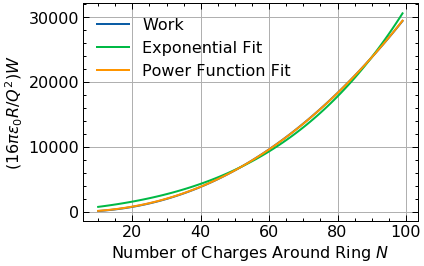

In [19]:
plt.plot(Ns, works, label='Work')
plt.plot(Ns, exp_func(Ns, a_fit_exp, b_fit_exp), label='Exponential Fit')
plt.plot(Ns, pow_func(Ns, a_fit_pow, b_fit_pow), label='Power Function Fit')
plt.xlabel('Number of Charges Around Ring $N$')
plt.ylabel('$(16 \pi \epsilon_0 R/Q^2) W$', fontsize=16)
plt.legend()
plt.grid()

Now consider the range $N=10$ to $N=1000$.

In [20]:
Ns = np.arange(10,1000)
works = [work(N) for N in Ns]

Plot in the region $N=10$ to $N=1000$ using fits obtained in the region $N=10$ to $N=100$ for the exponential function.

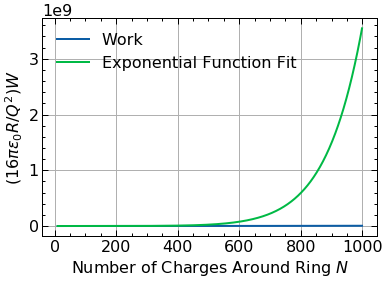

In [21]:
plt.plot(Ns, works, label='Work')
plt.plot(Ns, exp_func(Ns, a_fit_exp, b_fit_exp), label='Exponential Function Fit')
plt.xlabel('Number of Charges Around Ring $N$')
plt.ylabel('$(16 \pi \epsilon_0 R/Q^2) W$', fontsize=16)
plt.legend()
plt.grid()

Plot in the region $N=10$ to $N=1000$ using fits obtained in the region $N=10$ to $N=100$ for the power function.

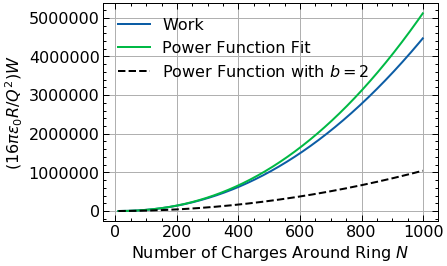

In [22]:
plt.plot(Ns, works, label='Work')
plt.plot(Ns, pow_func(Ns, a_fit_pow, b_fit_pow), label='Power Function Fit')
plt.plot(Ns, pow_func(Ns, a_fit_pow, 2), label='Power Function with $b=2$', color='black', ls='--')
plt.xlabel('Number of Charges Around Ring $N$')
plt.ylabel('$(16 \pi \epsilon_0 R/Q^2) W$', fontsize=16)
plt.legend()
plt.grid()

## Answer 3

In [23]:
a_fit_pow

1.045145667513038

In [24]:
b_fit_pow

2.230224631180312

$$ W = \frac{a Q^2}{16 \pi \epsilon_0 R} N^b $$

where $a \approx 1.05$ and $b \approx 2.23$. We have

\begin{align*}
\lim_{N \to \infty, Q \to 0} \frac{a Q^2}{16 \pi \epsilon_0 R} N^b &= \lim_{N \to \infty, Q \to 0} \frac{a (NQ)^2}{16 \pi \epsilon_0 R} N^{b-2}
\end{align*}

Note that $NQ \to \text{constant}$ but there is also the pesky factor of $N^{b-2}$ on the outside. Since $b>2$, the potential energy of the ring goes to infinity.